## Assignment:

Beat the performance of my Lasso regression by **using different feature engineering steps ONLY!!**.

The performance of my current model, as shown in this notebook is:

- test mse: 1063016789.3316755
- test rmse: 32603.938248801718
- test r2: 0.8453144708738004

To beat my model you will need a test r2 bigger than 0.85 and a rmse smaller than 32603.


=====================================================================================================


### Conditions:

- You MUST NOT change the hyperparameters of the Lasso.
- You MUST use the same seeds in Lasso and train_test_split as I show in this notebook (random_state)
- You MUST use all the features of the dataset (except Id) - you MUST NOT select features


=====================================================================================================


### If you beat my model:

Make a pull request with your notebook to this github repo:
https://github.com/solegalli/udemy-feml-challenge

And add your notebook to the folder:

-StudentsSolutions_v1.0.0

### How to make the PR

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the **fork** button at the top-right

2) clone your forked repo into your local computer:

- Go to www.github.com/yourusername/udemy-feml-challenge
- Click the green button that says clone or download
- copy the url that opens up
- power up a git console
- type: git clone (paste the url you copied from github)
- done

3) Make a copy of the jupyter notebook and add your name:

- Open up the Jupyter notebook called 13-Assignement.ipynb
- Click the "File" button at the top-right and then click "Make a copy"
- **Work your solution in the Copy** and not in the original assignment (otherwise there will be conflicts when making the PR)
- Change the name of the copy of the notebook to: 13-Assignement_yourname.ipynb
- Move the notebook to the folder **StudentsSolutions_v1.0.0**
- done

When you finish, just commit the new notebook to your fork and then make a PR to my repo.

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.


## But i have a notebook ready and I haven't cloned the repo yet, how can I make the PR?

If you worked in the copy you downloaded from Udemy before forking and cloning this repo, then follow this steps:

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the fork button at the top-right

2) clone your forked repo into your local computer:

Go to www.github.com/yourusername/udemy-feml-challenge

- Click the green button that says clone or download
- Copy the url that opens up
- Power up a git console
- Type: git clone (paste the url you copied from github)
- Done

3) Rename your solution as follows and copy it into your cloned repo:

- Rename your solution notebook to: 13-Assignement_yourname.ipynb
- Copy this file into the cloned repo, inside the folder **StudentsSolutions_v1.0.0**
- Done

When you finish, just commit the new notebook to your fork and then make a PR to my repo

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.

**Good luck!!**

## House Prices dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from feature_engine import transformation as vt
from feature_engine import outliers as o

### Load Datasets

In [2]:
# load dataset

data = pd.read_csv('./houseprice.csv')

In [3]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


#### Numerical variables

In [4]:
numerical_pos = []
for col in numerical:
    if data[col].min()>0:
        numerical_pos.append(col)
numerical_pos

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [5]:
numerical_zero = []
for col in numerical:
    if data[col].min()==0:
        numerical_zero.append(col)
numerical_zero

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [6]:
numerical_neg = []
for col in numerical:
    if data[col].min()<0:
        numerical_neg.append(col)
numerical_neg

[]

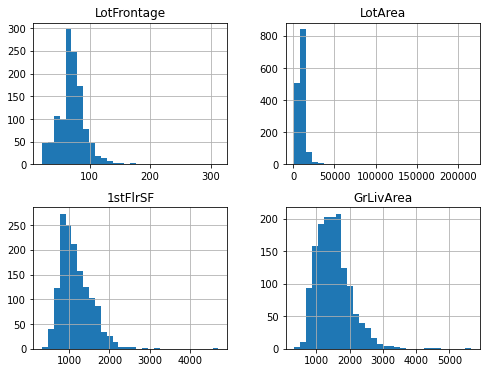

In [7]:
data[numerical_pos].hist(bins=30, figsize=(8,6))
plt.show()

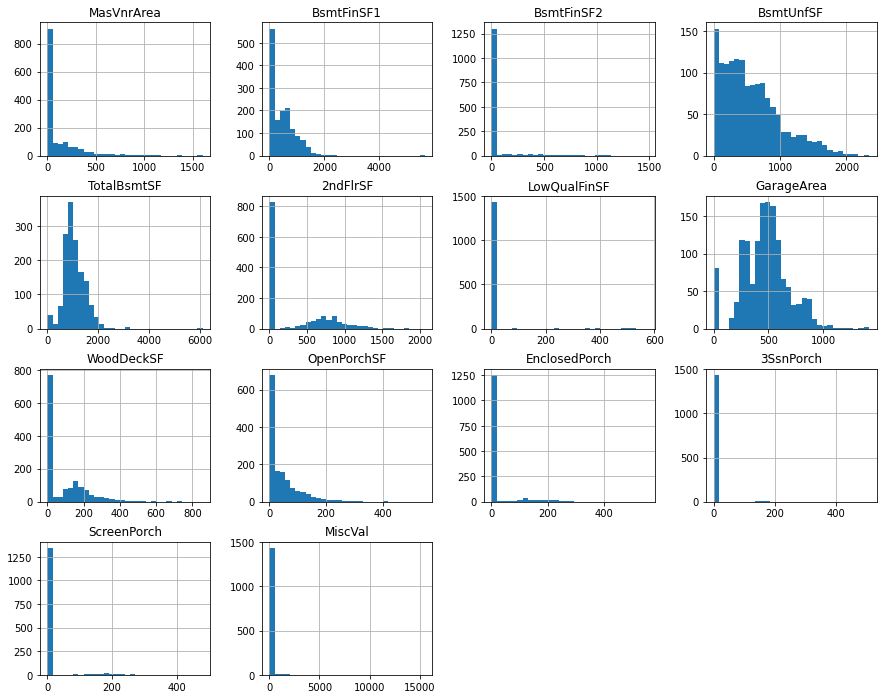

In [8]:
data[numerical_zero].hist(bins=30, figsize=(15,12))
plt.show()

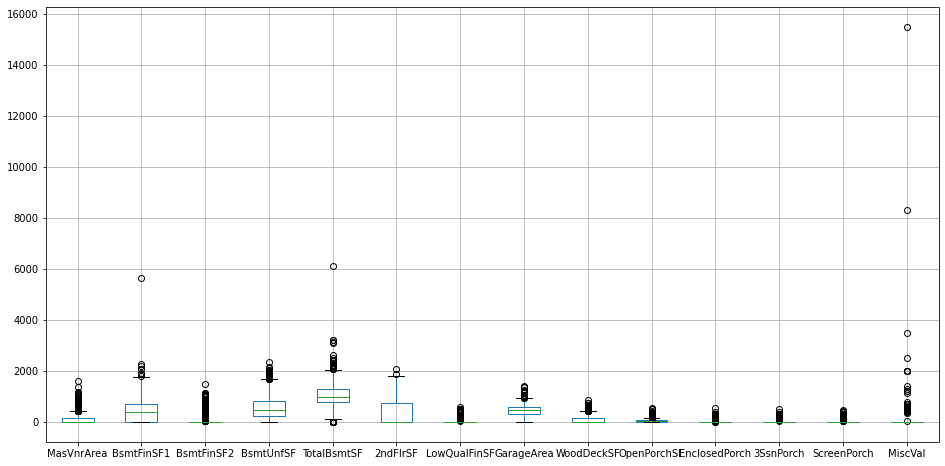

In [9]:
data[numerical_zero].boxplot(figsize=(16,8))
plt.show()

In [10]:
data[numerical].isnull().mean()[data[numerical].isnull().mean()>0]

LotFrontage    0.177397
MasVnrArea     0.005479
dtype: float64

#### Categorical variables

In [11]:
data[categorical].isnull().mean()[data[categorical].isnull().mean()>0]

Alley           0.937671
MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [12]:
categorical_under_5perc = data[categorical].isnull().mean()[(data[categorical].isnull().mean()>0) & (data[categorical].isnull().mean()<=0.05)]
categorical_under_5perc

MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
dtype: float64

In [13]:
categorical_under_5perc = list(categorical_under_5perc.index)

In [14]:
data[categorical].isnull().mean()[data[categorical].isnull().mean()>0.05].sort_values()

GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [15]:
categorical_under_5perc.append('GarageType')
categorical_under_5perc.append('GarageFinish')
categorical_under_5perc.append('GarageQual')
categorical_under_5perc.append('GarageCond')
categorical_under_5perc

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [16]:
data[categorical].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

#### Discrete variables

In [17]:
data[discrete].isnull().mean()[data[discrete].isnull().mean()>0]

Series([], dtype: float64)

In [18]:
data[discrete].nunique().sort_values(ascending=False)

MSSubClass      15
TotRmsAbvGrd    12
MoSold          12
OverallQual     10
OverallCond      9
BedroomAbvGr     8
PoolArea         8
GarageCars       5
BsmtFullBath     4
FullBath         4
KitchenAbvGr     4
Fireplaces       4
BsmtHalfBath     3
HalfBath         3
dtype: int64

#### Year variables

In [19]:
data[year_vars].isnull().mean()[data[year_vars].isnull().mean()>0]

GarageYrBlt    0.055479
dtype: float64

### Separate train and test set

In [20]:
# IMPORTANT: keep the random_state to zero for reproducibility
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.1,
    random_state=0)

In [21]:
# calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [22]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [23]:
year_vars = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [24]:
# capture the column names for use later in the notebook
final_columns = X_train.columns

## Feature Engineering Pipeline

In [25]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [26]:
house_pipe = Pipeline([

    # missing data imputation - section 4
    ('missing_ind',
     mdi.AddMissingIndicator(variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
    
    ('imputer_num',
     mdi.RandomSampleImputer(random_state = 28, variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
    
    ('imputer_cat_random_sample',  
     mdi.RandomSampleImputer(random_state = 28, variables=categorical_under_5perc)),
    
    ('imputer_cat', 
     mdi.CategoricalImputer(variables=categorical)),
    
    # categorical encoding - section 6
    ('rare_label_enc_cat',
     ce.RareLabelEncoder(tol=0.016, n_categories=5, variables=categorical)),
    
    ('rare_label_enc_discr',
     ce.RareLabelEncoder(tol=0.01, n_categories=1, variables=discrete)),
    
    ('categorical_enc',
     ce.MeanEncoder(variables=categorical+discrete)),  
    
    #transformation - section 7
    ('transform_log',
    vt.LogTransformer(variables = numerical_pos)),
    
    #discretisation - section 8
    ('discretisation',
     dsc.DecisionTreeDiscretiser(random_state=2909, variables=numerical+year_vars)),
    
    #outliers - section 9
    ('outliers',
     o.Winsorizer(capping_method='quantiles',
                          tail='both',
                          fold=0.05,
                          variables=['MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'WoodDeckSF', 'ScreenPorch', '3SsnPorch', 'MiscVal'])),
    
    # feature Scaling - section 10
    ('scaler', MinMaxScaler()),

    # regression
    ('lasso', Lasso(random_state=0))
])

In [27]:
# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

c:\python373\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
c:\python373\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
c:\python373\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
c:\python373\lib\site-packages\feature_engine\encoding\rare_label.py:181: UserWarning: The number of unique categories for variable LotShape is less than that indicated in n_categories. Thus, 

In [28]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 570372567.5515862
train rmse: 23882.47406680443
train r2: 0.9086502361328362

test mse: 771798255.9690912
test rmse: 27781.257278407887
test r2: 0.8876913113683599


Text(0, 0.5, 'Predicted Price')

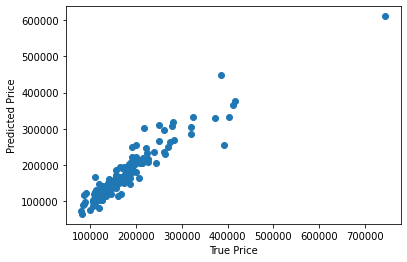

In [29]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot:>

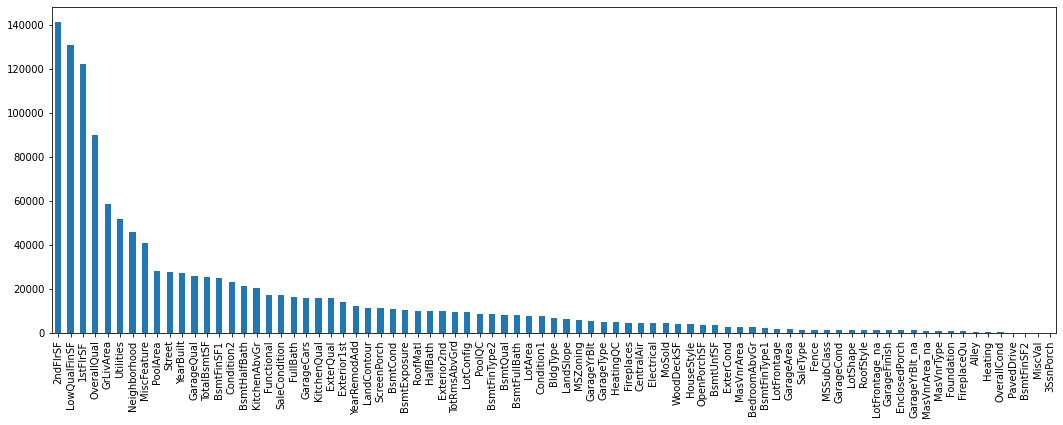

In [30]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))